# Customer Churn Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn=pd.read_csv('Churn_Modelling.csv')

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
churn.shape

(10000, 14)

In [6]:
churn.size

140000

In [7]:
churn.columns=churn.columns.str.strip()

In [8]:
churn.columns=churn.columns.str.lower()

In [9]:
churn.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [10]:
churn.isna().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [11]:
churn[churn.duplicated(subset=['customerid'],keep=False)]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
churn.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='exited', ylabel='count'>

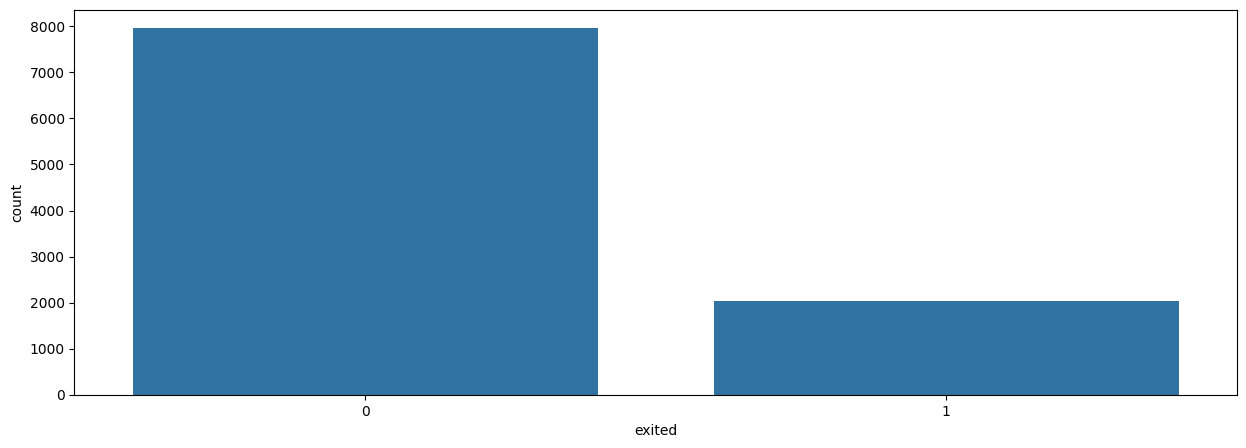

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn,x='exited')

In [15]:
churn['exited'].value_counts().to_frame()

,count
exited,
0,7963
1,2037


In [16]:
from sklearn.utils import resample

In [17]:
churn_majority=churn[churn['exited']==0]
churn_minority=churn[churn['exited']==1]

In [18]:
churn_majority_downsample=resample(churn_majority,n_samples=2037,replace=False,random_state=42)

In [19]:
churn_df=pd.concat([churn_majority_downsample,churn_minority])

In [20]:
churn_df['exited'].value_counts().to_frame()

,count
exited,
0,2037
1,2037


<Axes: xlabel='exited', ylabel='count'>

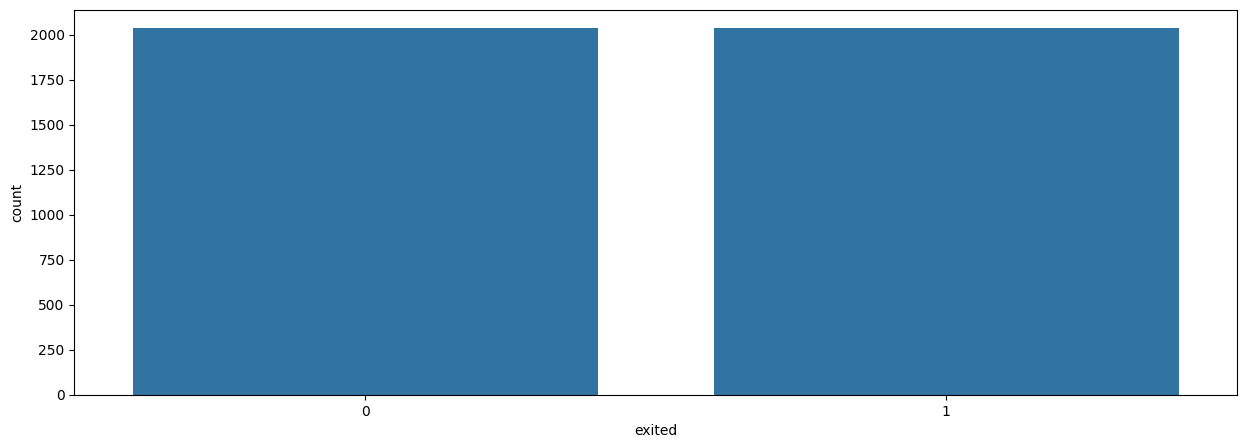

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn_df,x='exited')

In [22]:
churn_df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
8165,8166,15813503,Pickering,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0
6409,6410,15690695,Flynn,683,France,Female,33,9,0.00,2,1,1,38784.42,0
2157,2158,15750649,Uwakwe,744,France,Female,44,3,0.00,2,1,1,189016.14,0
1618,1619,15662955,Nicholls,697,France,Male,27,8,141223.68,2,1,0,90591.15,0
1633,1634,15755868,Farmer,562,France,Male,35,7,0.00,1,0,0,48869.67,0


In [23]:
churn_df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [24]:
churn_df.drop(['rownumber', 'customerid', 'surname','geography','gender'],axis=1,inplace=True)

In [25]:
churn_df.corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.019635,0.019156,0.022088,0.007916,0.002756,0.012992,-0.010973,-0.034660
age,-0.019635,1.000000,-0.029303,0.040785,-0.031884,-0.031115,0.016498,0.006669,0.343870
tenure,0.019156,-0.029303,1.000000,0.006340,0.019054,0.018600,-0.032413,0.025749,-0.016491
balance,0.022088,0.040785,0.006340,1.000000,-0.189561,-0.008388,-0.025617,0.001774,0.146820
numofproducts,0.007916,-0.031884,0.019054,-0.189561,1.000000,-0.008130,0.037570,0.008241,-0.054669
hascrcard,0.002756,-0.031115,0.018600,-0.008388,-0.008130,1.000000,-0.031892,-0.024178,-0.017800
isactivemember,0.012992,0.016498,-0.032413,-0.025617,0.037570,-0.031892,1.000000,-0.007396,-0.201877
estimatedsalary,-0.010973,0.006669,0.025749,0.001774,0.008241,-0.024178,-0.007396,1.000000,0.006173
exited,-0.034660,0.343870,-0.016491,0.146820,-0.054669,-0.017800,-0.201877,0.006173,1.000000


<Axes: >

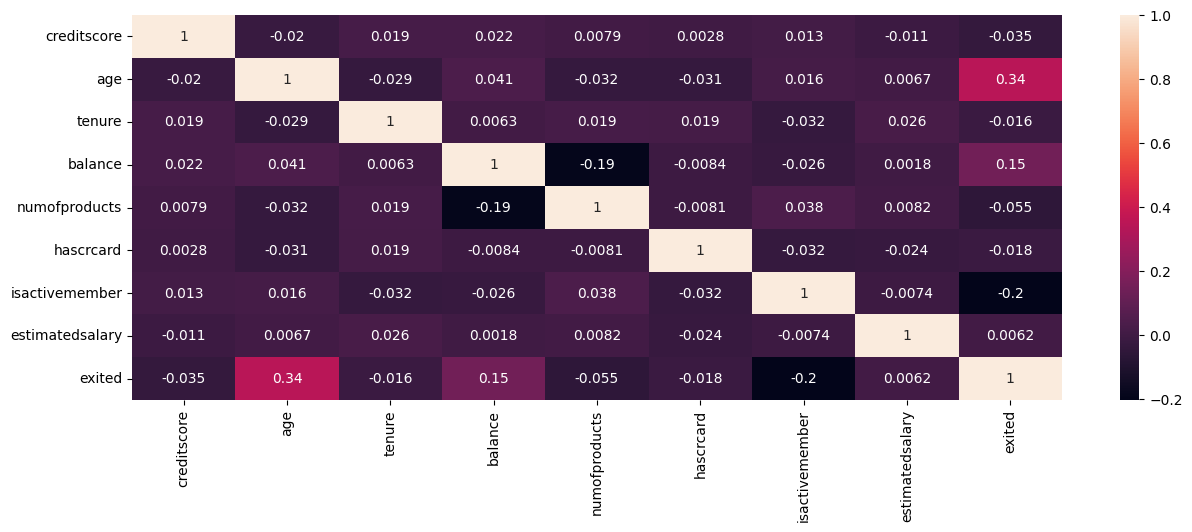

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(churn_df.corr(),annot=True)

In [27]:
df_corr_exit=churn_df.corr()['exited'].to_frame()

<Axes: xlabel='None', ylabel='exited'>

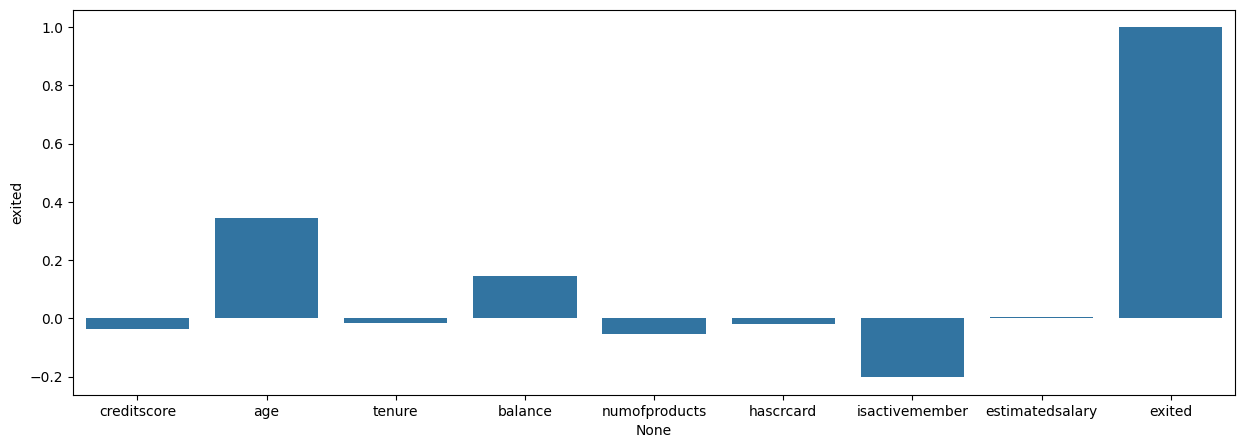

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_corr_exit,x=df_corr_exit.index,y='exited')

In [36]:
x=churn_df.drop(['exited'],axis=1)
y=churn_df['exited']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2851, 8), (1223, 8), (2851,), (1223,))

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr=LogisticRegression(max_iter=500)

In [42]:
lr.fit(x_train,y_train)

C:\Users\jodus\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [43]:
lr.score(x_train,y_train)

0.6632760434935111

In [44]:
lr.score(x_test,y_test)

0.6745707277187244

In [45]:
y_pred=lr.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [47]:
precision_score(y_test,y_pred)

0.6447574334898278

In [48]:
recall_score(y_test,y_pred)

0.7066895368782161

In [49]:
accuracy_score(y_test,y_pred)

0.6745707277187244

In [50]:
f1_score(y_test,y_pred)

0.67430441898527

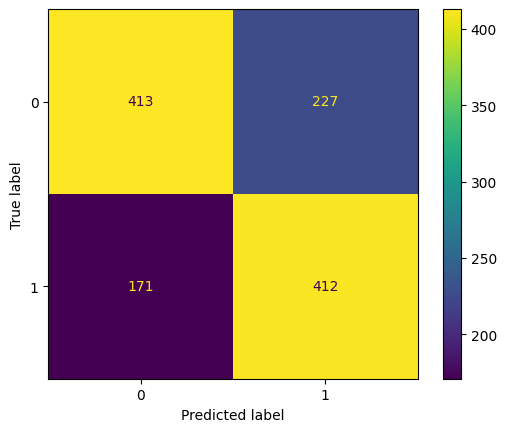

In [51]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

In [52]:
from sklearn.linear_model import LogisticRegressionCV

In [53]:
lr=LogisticRegressionCV(max_iter=500,solver='liblinear',penalty='l1',cv=3,Cs=10)

In [54]:
lr.fit(x_train,y_train)

LogisticRegressionCV(cv=3, max_iter=500, penalty='l1', solver='liblinear')

In [55]:
lr.score(x_train,y_train)

0.6815152578042792

In [56]:
lr.score(x_test,y_test)

0.7031888798037612

In [57]:
y_pred=lr.predict(x_test)

In [58]:
precision_score(y_test,y_pred)

0.680327868852459

In [59]:
recall_score(y_test,y_pred)

0.7118353344768439

In [60]:
accuracy_score(y_test,y_pred)

0.7031888798037612

In [61]:
f1_score(y_test,y_pred)

0.6957250628667225

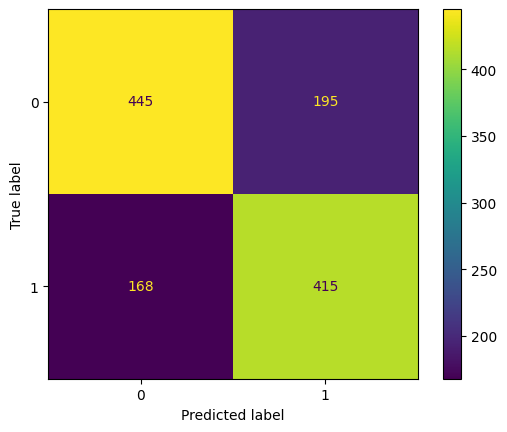

In [62]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

In [63]:
lr=LogisticRegressionCV(max_iter=500,solver='liblinear',penalty='l2',cv=4,Cs=10)

In [64]:
lr.fit(x_train,y_train)

LogisticRegressionCV(cv=4, max_iter=500, solver='liblinear')

In [65]:
lr.score(x_train,y_train)

0.6660820764643984

In [66]:
lr.score(x_test,y_test)

0.660670482420278

In [67]:
y_pred=lr.predict(x_test)

In [68]:
precision_score(y_test,y_pred)

0.6304347826086957

In [69]:
recall_score(y_test,y_pred)

0.6963979416809606

In [70]:
accuracy_score(y_test,y_pred)

0.660670482420278

In [71]:
f1_score(y_test,y_pred)

0.6617766911165445

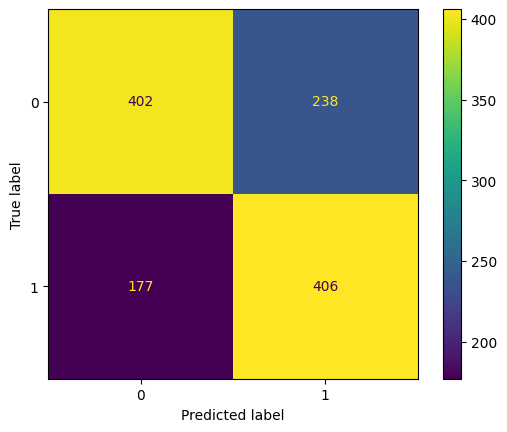

In [72]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [75]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [76]:
knn.score(x_train,y_train)

0.7642932304454577

In [77]:
knn.score(x_test,y_test)

0.5257563368765331

In [78]:
y_pred=lr.predict(x_test)

In [79]:
precision_score(y_test,y_pred)

0.6304347826086957

In [80]:
recall_score(y_test,y_pred)

0.6963979416809606

In [81]:
accuracy_score(y_test,y_pred)

0.660670482420278

In [82]:
f1_score(y_test,y_pred)

0.6617766911165445

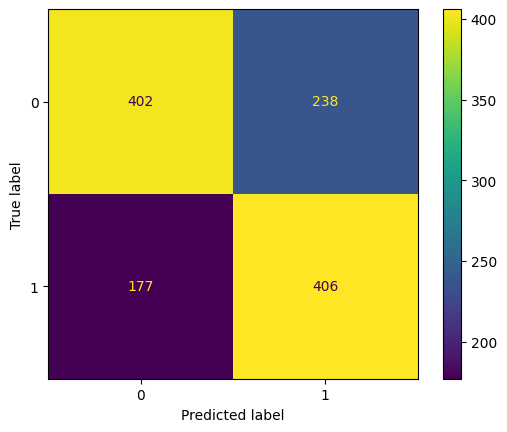

In [83]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=knn.classes_),display_labels=knn.classes_)
cmd.plot()

In [84]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
ss=StandardScaler()

In [87]:
x_train_ss=ss.fit_transform(x_train)
x_test_ss=ss.fit_transform(x_test)

In [88]:
knn.fit(x_train_ss,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [89]:
knn.score(x_train_ss,y_train)

0.8439144159943879

In [90]:
knn.score(x_test_ss,y_test)

0.7228127555192151

In [91]:
y_pred=knn.predict(x_test_ss)

In [92]:
precision_score(y_test,y_pred)

0.708904109589041

In [93]:
recall_score(y_test,y_pred)

0.7101200686106347

In [94]:
accuracy_score(y_test,y_pred)

0.7228127555192151

In [95]:
f1_score(y_test,y_pred)

0.7095115681233933

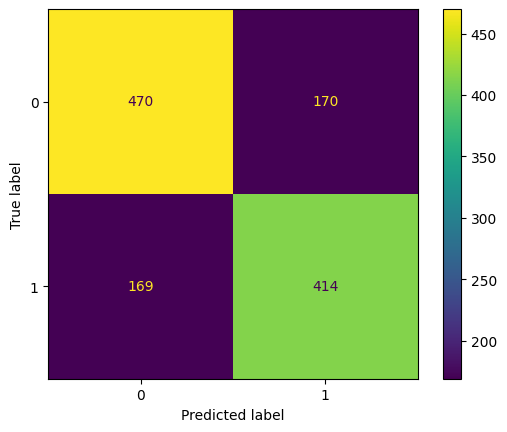

In [96]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=knn.classes_),display_labels=knn.classes_)
cmd.plot()

In [97]:
from sklearn.svm import SVC

In [98]:
svc=SVC(kernel='rbf',gamma=2,C=1)

In [99]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=2)

In [100]:
svc.score(x_train,y_train)

1.0

In [101]:
svc.score(x_test,y_test)

0.4766966475878986

In [102]:
y_pred=knn.predict(x_test_ss)

In [103]:
precision_score(y_test,y_pred)

0.708904109589041

In [104]:
recall_score(y_test,y_pred)

0.7101200686106347

In [105]:
accuracy_score(y_test,y_pred)

0.7228127555192151

In [106]:
f1_score(y_test,y_pred)

0.7095115681233933

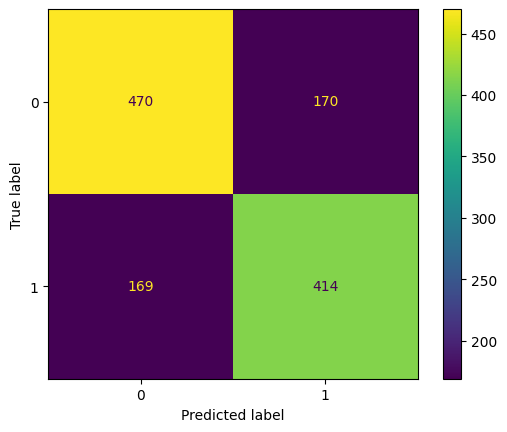

In [107]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=svc.classes_),display_labels=svc.classes_)
cmd.plot()